In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import random
import numpy as np
from collections import deque
from scipy.stats import entropy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from environments import *
from models import *
import torch.nn.functional as F
import optuna
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

d:\Projects\EE_Spectrum_Hole_Detection_with_RL\New_Notebooks\models.py:39: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\utils\tensor_new.cpp:257.)
  torch.tensor(state, dtype=torch.float32).to(device).unsqueeze(1),


Ep 0 | Reward=-109.7 | Acc=0.51, Prec=0.61, Rec=0.52, F1=0.56, ROC-AUC=0.34
Ep 10 | Reward=839.3 | Acc=0.47, Prec=0.19, Rec=0.44, F1=0.26, ROC-AUC=1.00
Ep 20 | Reward=615.4 | Acc=0.47, Prec=0.33, Rec=0.45, F1=0.38, ROC-AUC=1.00
Ep 30 | Reward=376.1 | Acc=0.47, Prec=0.34, Rec=0.43, F1=0.38, ROC-AUC=1.00
Ep 40 | Reward=0.2 | Acc=0.47, Prec=0.62, Rec=0.48, F1=0.54, ROC-AUC=1.00
Ep 50 | Reward=253.3 | Acc=0.46, Prec=0.59, Rec=0.51, F1=0.55, ROC-AUC=1.00
Ep 60 | Reward=644.9 | Acc=0.46, Prec=0.43, Rec=0.46, F1=0.45, ROC-AUC=1.00
Ep 70 | Reward=-13.2 | Acc=0.52, Prec=0.72, Rec=0.52, F1=0.60, ROC-AUC=1.00
Ep 80 | Reward=623.2 | Acc=0.48, Prec=0.59, Rec=0.50, F1=0.54, ROC-AUC=1.00
Ep 90 | Reward=755.0 | Acc=0.51, Prec=0.40, Rec=0.46, F1=0.43, ROC-AUC=1.00
Ep 100 | Reward=633.2 | Acc=0.52, Prec=0.54, Rec=0.52, F1=0.53, ROC-AUC=1.00
Ep 110 | Reward=1021.8 | Acc=0.60, Prec=0.45, Rec=0.52, F1=0.49, ROC-AUC=1.00
Ep 120 | Reward=987.8 | Acc=0.45, Prec=0.44, Rec=0.45, F1=0.45, ROC-AUC=1.00
Ep 130 | R

d:\Projects\venv\lib\site-packages\sklearn\metrics\_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


Ep 290 | Reward=1518.9 | Acc=0.74, Prec=0.23, Rec=0.35, F1=0.28, ROC-AUC=1.00


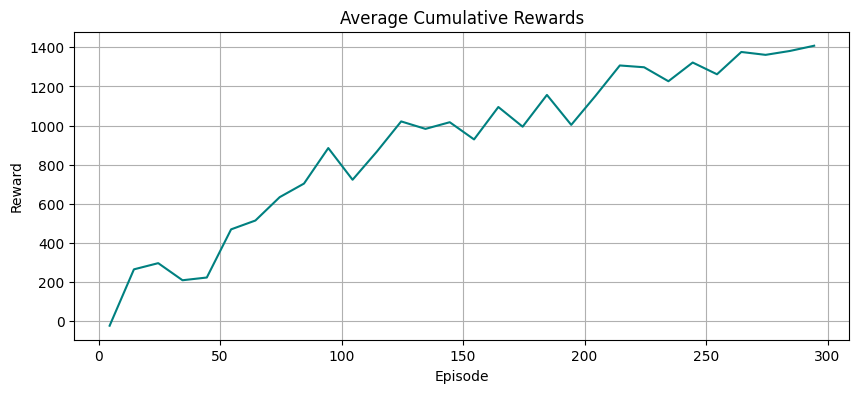

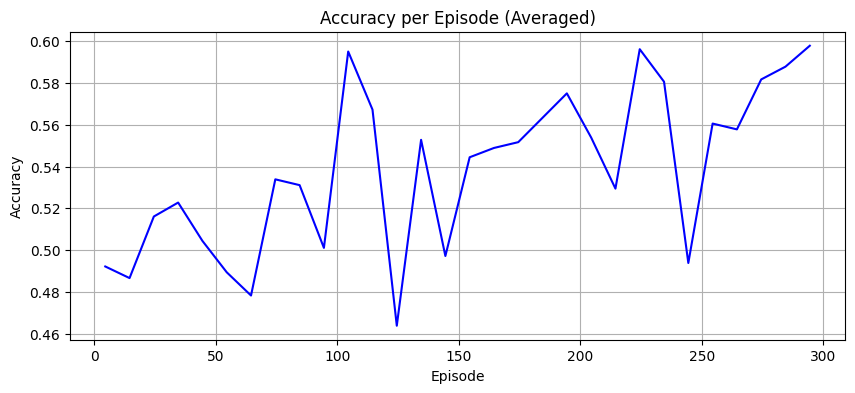

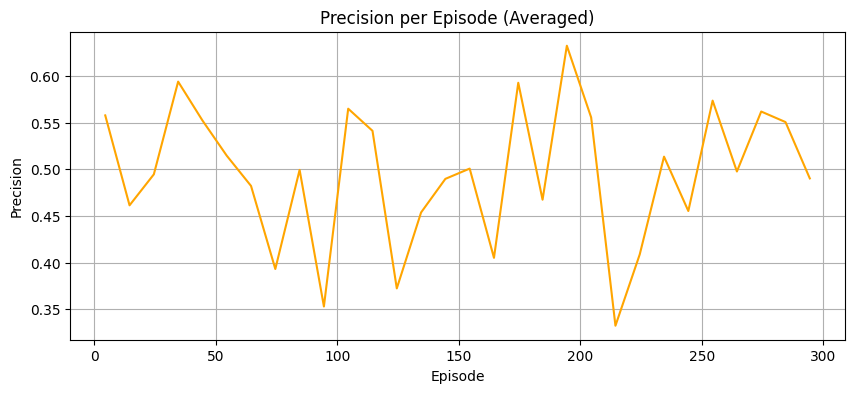

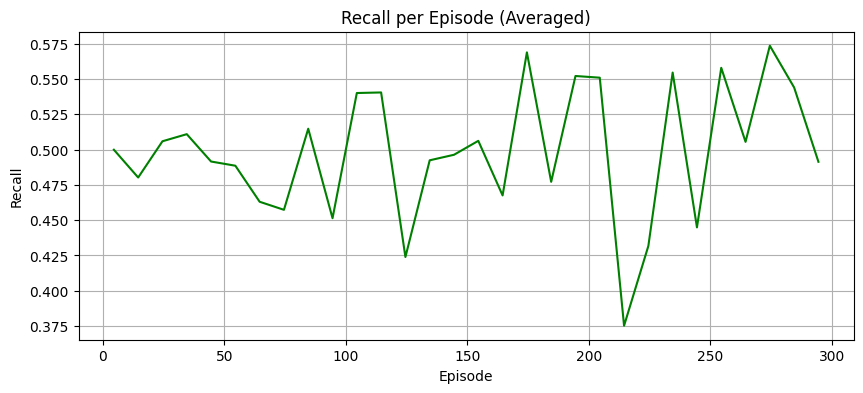

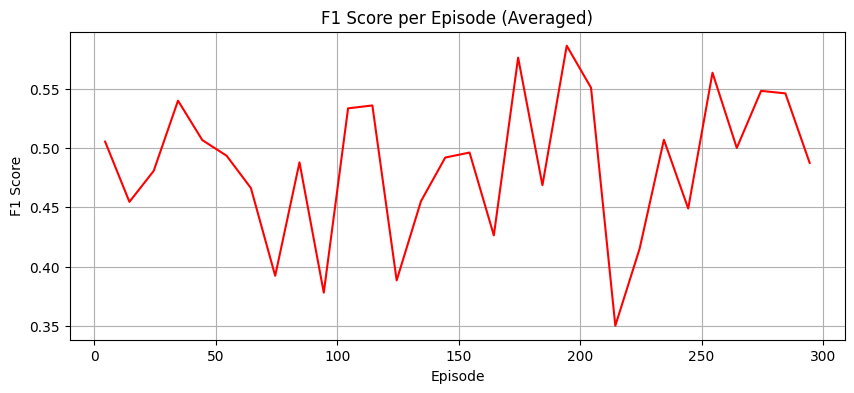

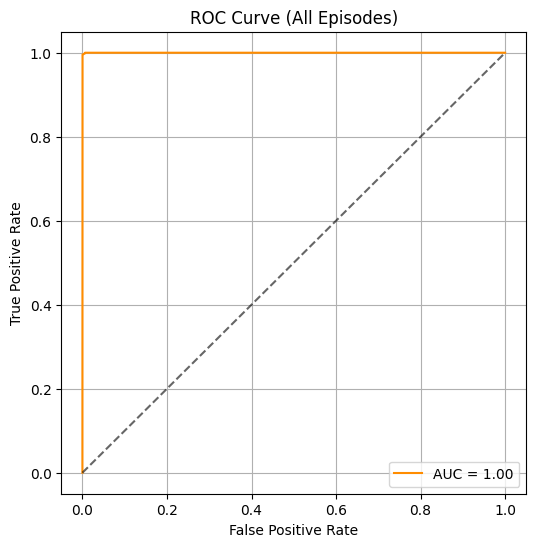

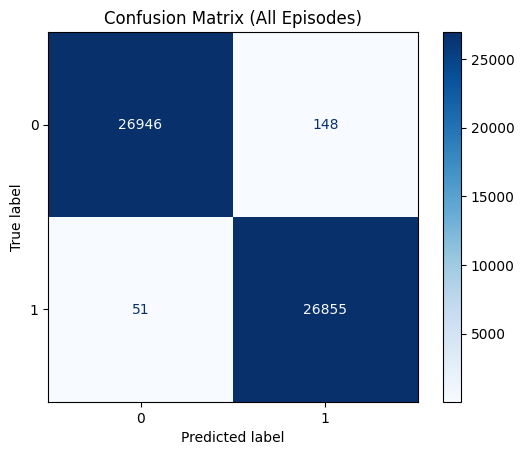

In [2]:
rewards_dict = {}
L = ['dqn','cnn','ann_lstm','cnn_lstm','transformer','bayesian']
env = SBEOS_Environment(window_size=10,reward=10,penalty=10,pressure=0.1)
rewards, metrics, epoch_lengths, window_sizes, y_true, y_scores = train_dqn(env,model_type=L[2],num_episodes=300)
plot_metrics(rewards, metrics, epoch_lengths, window_sizes, y_true, y_scores, avg_window=10)
rewards_dict[2] = rewards

Ep 0 | Reward=172.0 | Acc=0.52, Prec=0.59, Rec=0.55, F1=0.57, ROC-AUC=0.45
Ep 10 | Reward=215.0 | Acc=0.56, Prec=0.51, Rec=0.58, F1=0.54, ROC-AUC=1.00
Ep 20 | Reward=-635.0 | Acc=0.47, Prec=0.82, Rec=0.46, F1=0.59, ROC-AUC=1.00
Ep 30 | Reward=385.2 | Acc=0.48, Prec=0.60, Rec=0.53, F1=0.56, ROC-AUC=1.00
Ep 40 | Reward=287.1 | Acc=0.53, Prec=0.59, Rec=0.51, F1=0.55, ROC-AUC=1.00
Ep 50 | Reward=74.4 | Acc=0.54, Prec=0.71, Rec=0.56, F1=0.63, ROC-AUC=1.00
Ep 60 | Reward=733.9 | Acc=0.37, Prec=0.31, Rec=0.38, F1=0.34, ROC-AUC=1.00
Ep 70 | Reward=676.5 | Acc=0.45, Prec=0.32, Rec=0.32, F1=0.32, ROC-AUC=1.00
Ep 80 | Reward=658.0 | Acc=0.37, Prec=0.44, Rec=0.39, F1=0.41, ROC-AUC=1.00


d:\Projects\venv\lib\site-packages\sklearn\metrics\_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


Ep 90 | Reward=488.7 | Acc=0.61, Prec=0.78, Rec=0.64, F1=0.70, ROC-AUC=1.00
Ep 100 | Reward=599.5 | Acc=0.56, Prec=0.74, Rec=0.61, F1=0.67, ROC-AUC=1.00
Ep 110 | Reward=807.7 | Acc=0.43, Prec=0.57, Rec=0.48, F1=0.52, ROC-AUC=1.00
Ep 120 | Reward=529.6 | Acc=0.55, Prec=0.71, Rec=0.59, F1=0.64, ROC-AUC=1.00
Ep 130 | Reward=872.9 | Acc=0.61, Prec=0.76, Rec=0.62, F1=0.69, ROC-AUC=1.00


d:\Projects\venv\lib\site-packages\sklearn\metrics\_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


Ep 140 | Reward=1281.0 | Acc=0.70, Prec=0.09, Rec=0.50, F1=0.16, ROC-AUC=1.00
Ep 150 | Reward=1014.4 | Acc=0.48, Prec=0.61, Rec=0.56, F1=0.58, ROC-AUC=1.00
Ep 160 | Reward=1382.4 | Acc=0.75, Prec=0.35, Rec=0.71, F1=0.47, ROC-AUC=1.00
Ep 170 | Reward=830.9 | Acc=0.60, Prec=0.70, Rec=0.69, F1=0.69, ROC-AUC=1.00
Ep 180 | Reward=844.3 | Acc=0.57, Prec=0.74, Rec=0.63, F1=0.68, ROC-AUC=1.00
Ep 190 | Reward=1226.6 | Acc=0.48, Prec=0.44, Rec=0.45, F1=0.44, ROC-AUC=1.00
Ep 200 | Reward=790.8 | Acc=0.74, Prec=0.94, Rec=0.77, F1=0.85, ROC-AUC=1.00
Ep 210 | Reward=1014.2 | Acc=0.57, Prec=0.70, Rec=0.64, F1=0.67, ROC-AUC=1.00
Ep 220 | Reward=1194.8 | Acc=0.50, Prec=0.52, Rec=0.50, F1=0.51, ROC-AUC=1.00
Ep 230 | Reward=1446.3 | Acc=0.64, Prec=0.20, Rec=0.30, F1=0.24, ROC-AUC=1.00
Ep 240 | Reward=1436.3 | Acc=0.62, Prec=0.19, Rec=0.28, F1=0.23, ROC-AUC=1.00
Ep 250 | Reward=1309.9 | Acc=0.57, Prec=0.59, Rec=0.60, F1=0.59, ROC-AUC=1.00
Ep 260 | Reward=1119.0 | Acc=0.44, Prec=0.55, Rec=0.52, F1=0.53, RO

d:\Projects\venv\lib\site-packages\sklearn\metrics\_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


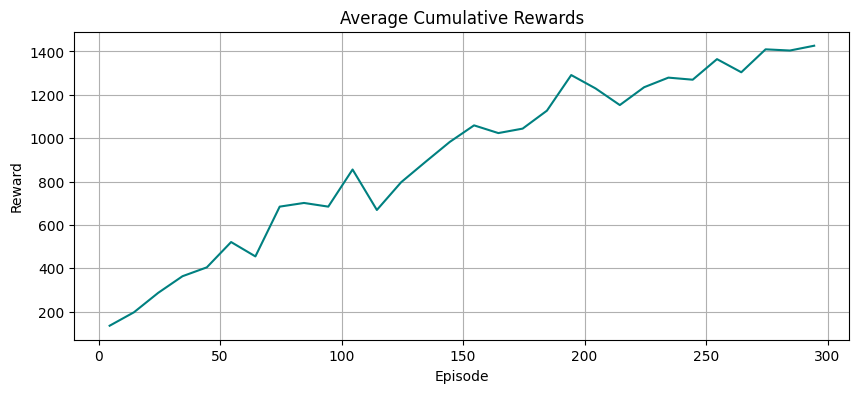

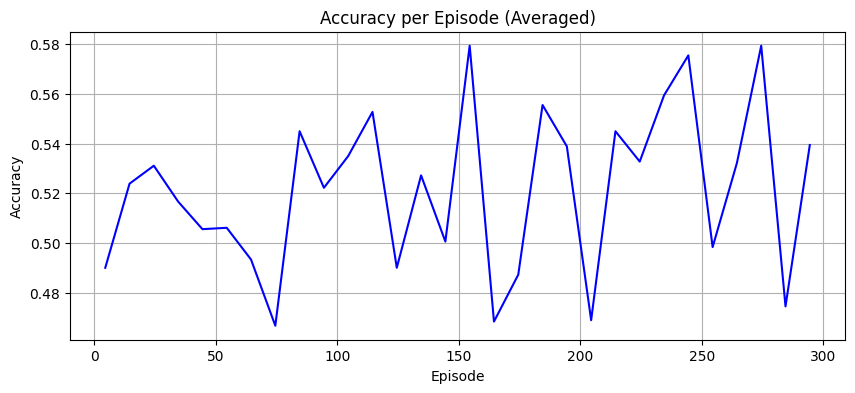

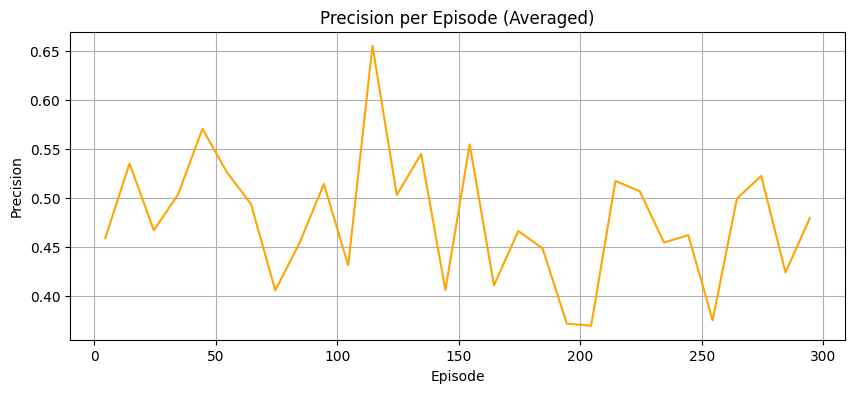

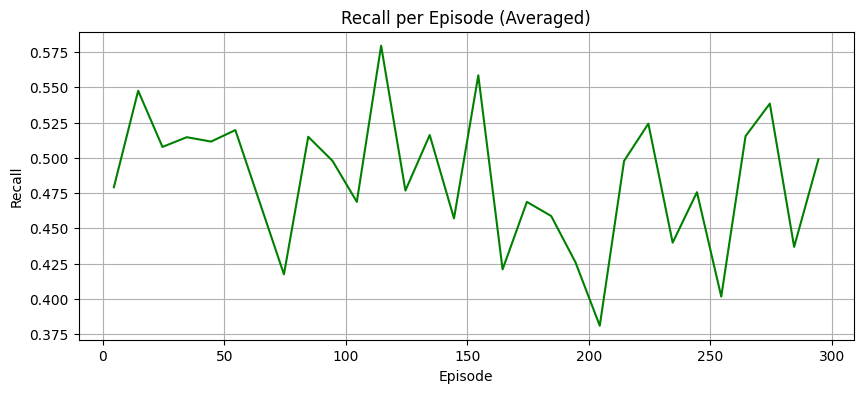

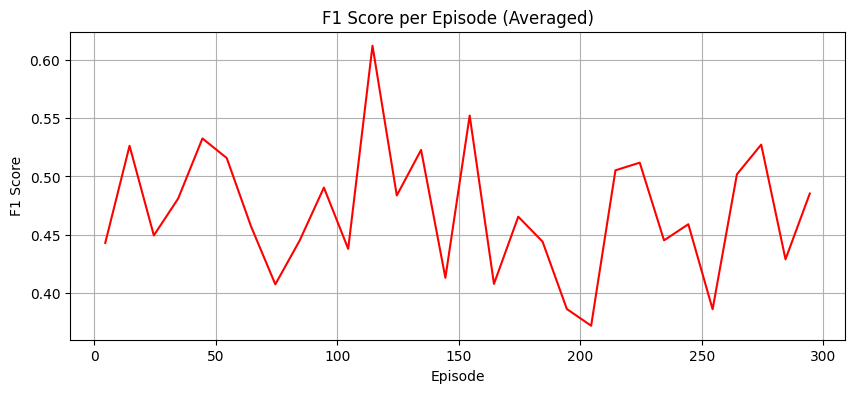

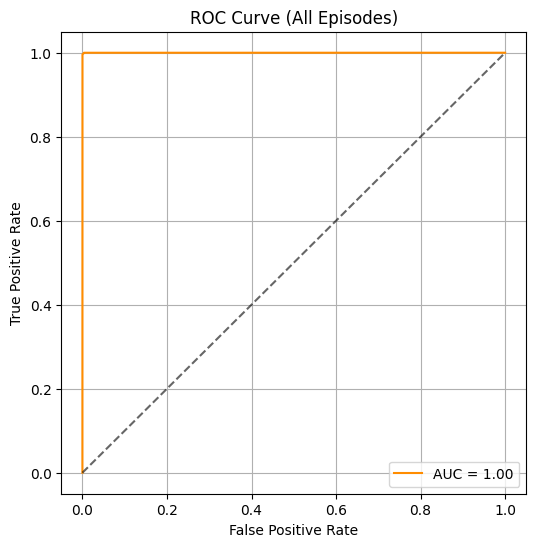

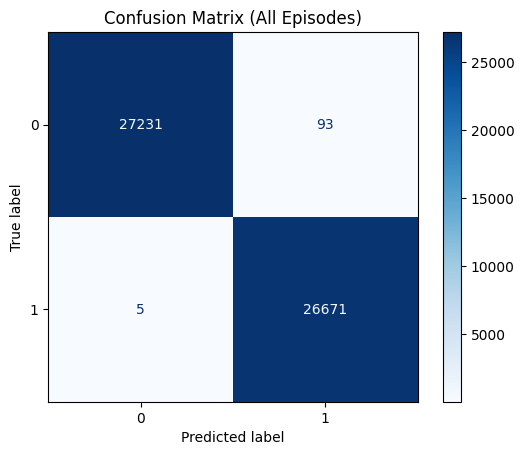

In [3]:
rewards_dict = {}
env = SBEOS_Environment(window_size=10,reward=10,penalty=10,pressure=0.1)
rewards, metrics, epoch_lengths, window_sizes, y_true, y_scores = train_dqn(env,model_type=L[0],num_episodes=300)
plot_metrics(rewards, metrics, epoch_lengths, window_sizes, y_true, y_scores, avg_window=10)
rewards_dict[0] = rewards

Ep 0 | Reward=-402.1 | Acc=0.43, Prec=0.55, Rec=0.40, F1=0.46, ROC-AUC=0.58
Ep 10 | Reward=178.0 | Acc=0.52, Prec=0.53, Rec=0.53, F1=0.53, ROC-AUC=1.00
Ep 20 | Reward=818.5 | Acc=0.56, Prec=0.23, Rec=0.54, F1=0.32, ROC-AUC=1.00
Ep 30 | Reward=283.6 | Acc=0.47, Prec=0.40, Rec=0.38, F1=0.39, ROC-AUC=1.00
Ep 40 | Reward=442.3 | Acc=0.53, Prec=0.46, Rec=0.50, F1=0.48, ROC-AUC=1.00
Ep 50 | Reward=487.5 | Acc=0.50, Prec=0.57, Rec=0.56, F1=0.57, ROC-AUC=1.00
Ep 60 | Reward=918.8 | Acc=0.51, Prec=0.29, Rec=0.45, F1=0.35, ROC-AUC=1.00
Ep 70 | Reward=371.9 | Acc=0.51, Prec=0.63, Rec=0.51, F1=0.56, ROC-AUC=1.00
Ep 80 | Reward=339.0 | Acc=0.68, Prec=0.89, Rec=0.70, F1=0.78, ROC-AUC=1.00
Ep 90 | Reward=706.6 | Acc=0.46, Prec=0.34, Rec=0.35, F1=0.35, ROC-AUC=1.00
Ep 100 | Reward=640.3 | Acc=0.44, Prec=0.51, Rec=0.49, F1=0.50, ROC-AUC=1.00
Ep 110 | Reward=733.0 | Acc=0.44, Prec=0.45, Rec=0.43, F1=0.44, ROC-AUC=1.00
Ep 120 | Reward=590.4 | Acc=0.56, Prec=0.59, Rec=0.55, F1=0.57, ROC-AUC=1.00
Ep 130 | 

d:\Projects\venv\lib\site-packages\sklearn\metrics\_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


Ep 140 | Reward=980.7 | Acc=0.33, Prec=0.39, Rec=0.37, F1=0.38, ROC-AUC=1.00
Ep 150 | Reward=784.0 | Acc=0.60, Prec=0.73, Rec=0.67, F1=0.69, ROC-AUC=1.00
Ep 160 | Reward=1097.5 | Acc=0.37, Prec=0.41, Rec=0.44, F1=0.42, ROC-AUC=1.00
Ep 170 | Reward=834.1 | Acc=0.43, Prec=0.59, Rec=0.51, F1=0.55, ROC-AUC=1.00
Ep 180 | Reward=581.5 | Acc=0.71, Prec=0.93, Rec=0.73, F1=0.82, ROC-AUC=1.00
Ep 190 | Reward=1051.2 | Acc=0.53, Prec=0.52, Rec=0.53, F1=0.53, ROC-AUC=1.00
Ep 200 | Reward=1123.5 | Acc=0.52, Prec=0.58, Rec=0.58, F1=0.58, ROC-AUC=1.00
Ep 210 | Reward=1231.2 | Acc=0.37, Prec=0.40, Rec=0.39, F1=0.40, ROC-AUC=1.00
Ep 220 | Reward=1341.0 | Acc=0.51, Prec=0.46, Rec=0.47, F1=0.46, ROC-AUC=1.00
Ep 230 | Reward=1133.2 | Acc=0.19, Prec=0.20, Rec=0.21, F1=0.21, ROC-AUC=1.00
Ep 240 | Reward=1371.3 | Acc=0.61, Prec=0.36, Rec=0.42, F1=0.39, ROC-AUC=1.00
Ep 250 | Reward=1492.6 | Acc=0.81, Prec=0.03, Rec=0.33, F1=0.05, ROC-AUC=1.00
Ep 260 | Reward=1347.7 | Acc=0.39, Prec=0.48, Rec=0.50, F1=0.49, ROC

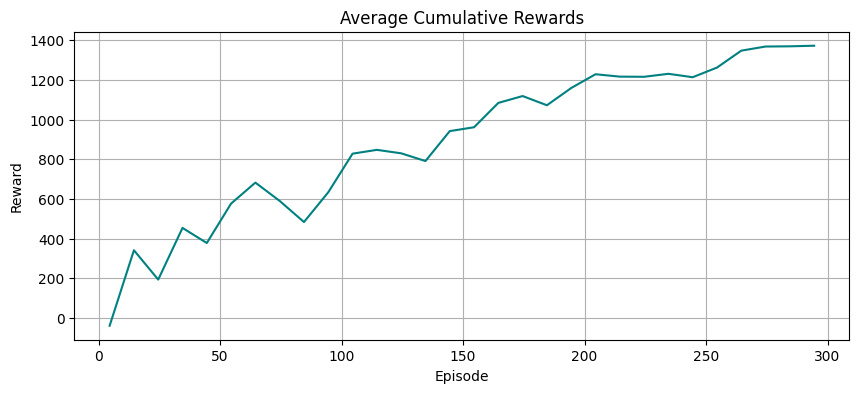

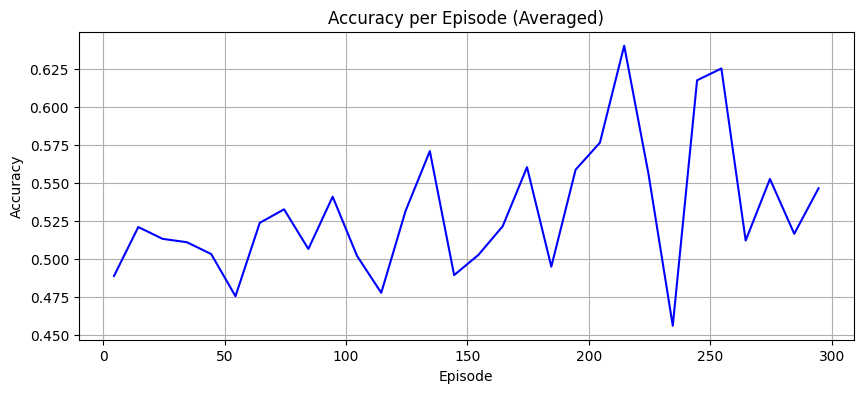

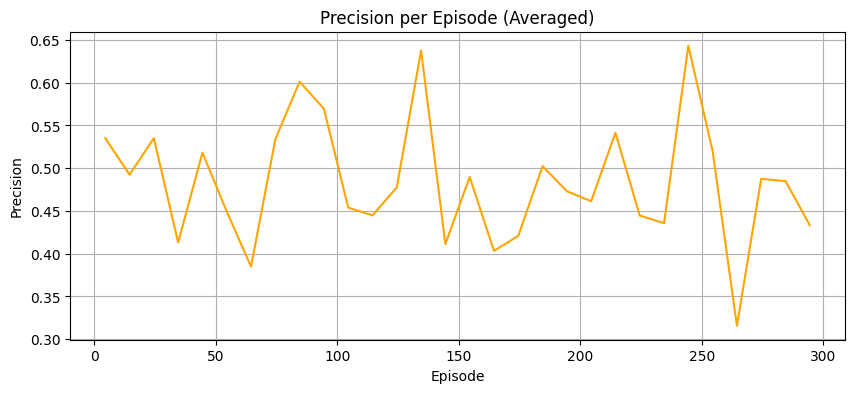

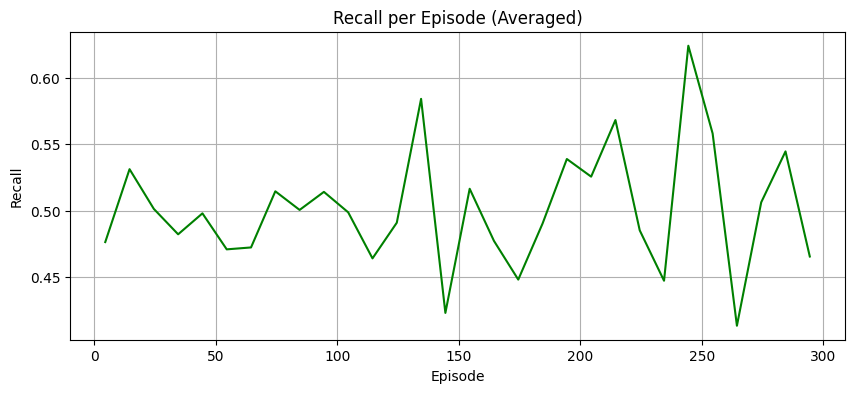

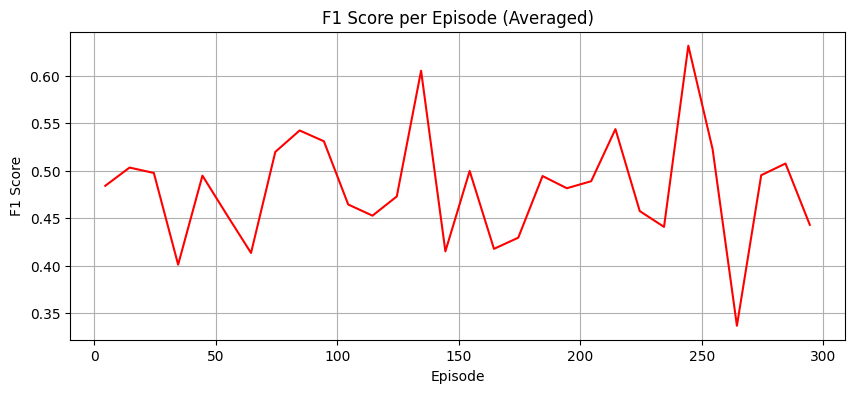

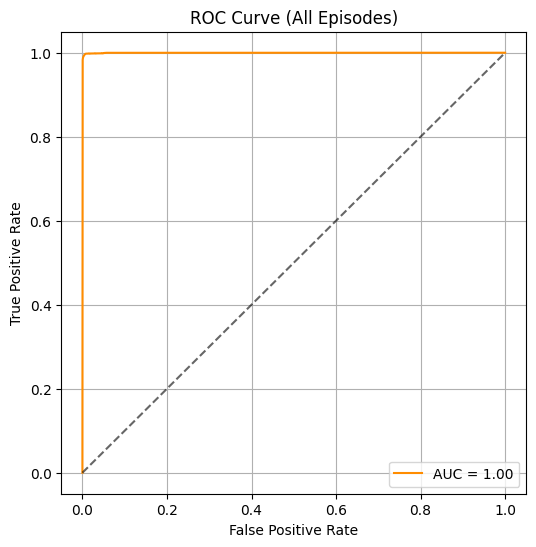

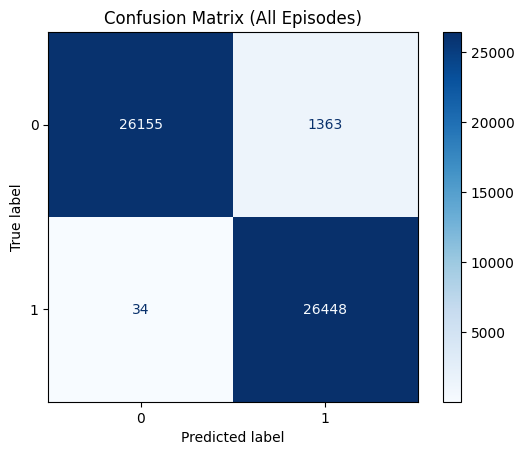

In [4]:
rewards_dict = {}
env = SBEOS_Environment(window_size=10,reward=10,penalty=10,pressure=0.1)
rewards, metrics, epoch_lengths, window_sizes, y_true, y_scores = train_dqn(env,model_type=L[3],num_episodes=300)
plot_metrics(rewards, metrics, epoch_lengths, window_sizes, y_true, y_scores, avg_window=10)
rewards_dict[3] = rewards

Ep 0 | Reward=-193.5 | Acc=0.44, Prec=0.56, Rec=0.47, F1=0.51, ROC-AUC=0.83
Ep 10 | Reward=694.6 | Acc=0.56, Prec=0.35, Rec=0.58, F1=0.44, ROC-AUC=1.00
Ep 20 | Reward=620.3 | Acc=0.42, Prec=0.25, Rec=0.40, F1=0.31, ROC-AUC=1.00
Ep 30 | Reward=533.7 | Acc=0.49, Prec=0.46, Rec=0.46, F1=0.46, ROC-AUC=1.00
Ep 40 | Reward=458.6 | Acc=0.57, Prec=0.51, Rec=0.54, F1=0.52, ROC-AUC=1.00
Ep 50 | Reward=500.3 | Acc=0.52, Prec=0.55, Rec=0.53, F1=0.54, ROC-AUC=1.00
Ep 60 | Reward=752.5 | Acc=0.56, Prec=0.43, Rec=0.59, F1=0.50, ROC-AUC=1.00
Ep 70 | Reward=146.5 | Acc=0.57, Prec=0.73, Rec=0.58, F1=0.65, ROC-AUC=1.00


d:\Projects\venv\lib\site-packages\sklearn\metrics\_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


Ep 80 | Reward=582.4 | Acc=0.52, Prec=0.43, Rec=0.42, F1=0.42, ROC-AUC=1.00
Ep 90 | Reward=449.5 | Acc=0.42, Prec=0.57, Rec=0.47, F1=0.51, ROC-AUC=1.00
Ep 100 | Reward=168.4 | Acc=0.66, Prec=0.93, Rec=0.68, F1=0.79, ROC-AUC=1.00
Ep 110 | Reward=611.7 | Acc=0.46, Prec=0.59, Rec=0.52, F1=0.55, ROC-AUC=1.00
Ep 120 | Reward=879.9 | Acc=0.49, Prec=0.63, Rec=0.56, F1=0.59, ROC-AUC=1.00
Ep 130 | Reward=1121.8 | Acc=0.57, Prec=0.22, Rec=0.38, F1=0.28, ROC-AUC=1.00
Ep 140 | Reward=1311.5 | Acc=0.64, Prec=0.47, Rec=0.58, F1=0.52, ROC-AUC=1.00


d:\Projects\venv\lib\site-packages\sklearn\metrics\_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
d:\Projects\venv\lib\site-packages\sklearn\metrics\_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


Ep 150 | Reward=1113.7 | Acc=0.40, Prec=0.54, Rec=0.49, F1=0.51, ROC-AUC=1.00
Ep 160 | Reward=1260.4 | Acc=0.64, Prec=0.53, Rec=0.59, F1=0.56, ROC-AUC=1.00
Ep 170 | Reward=1060.6 | Acc=0.57, Prec=0.67, Rec=0.64, F1=0.65, ROC-AUC=1.00
Ep 180 | Reward=1373.5 | Acc=0.77, Prec=0.16, Rec=0.70, F1=0.25, ROC-AUC=1.00
Ep 190 | Reward=942.0 | Acc=0.43, Prec=0.46, Rec=0.41, F1=0.43, ROC-AUC=1.00
Ep 200 | Reward=1000.8 | Acc=0.68, Prec=0.84, Rec=0.74, F1=0.79, ROC-AUC=1.00
Ep 210 | Reward=1424.0 | Acc=0.36, Prec=0.11, Rec=0.14, F1=0.12, ROC-AUC=1.00
Ep 220 | Reward=986.5 | Acc=0.42, Prec=0.61, Rec=0.51, F1=0.56, ROC-AUC=1.00


d:\Projects\venv\lib\site-packages\sklearn\metrics\_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


Ep 230 | Reward=1066.7 | Acc=0.57, Prec=0.75, Rec=0.65, F1=0.70, ROC-AUC=1.00
Ep 240 | Reward=1118.4 | Acc=0.70, Prec=0.83, Rec=0.72, F1=0.77, ROC-AUC=0.99
Ep 250 | Reward=1370.3 | Acc=0.33, Prec=0.19, Rec=0.21, F1=0.20, ROC-AUC=1.00
Ep 260 | Reward=1210.6 | Acc=0.86, Prec=0.99, Rec=0.87, F1=0.92, ROC-AUC=1.00
Ep 270 | Reward=1272.4 | Acc=0.46, Prec=0.53, Rec=0.51, F1=0.52, ROC-AUC=0.99
Ep 280 | Reward=1316.4 | Acc=0.44, Prec=0.55, Rec=0.56, F1=0.56, ROC-AUC=1.00
Ep 290 | Reward=1581.1 | Acc=0.88, Prec=0.05, Rec=0.33, F1=0.09, ROC-AUC=1.00


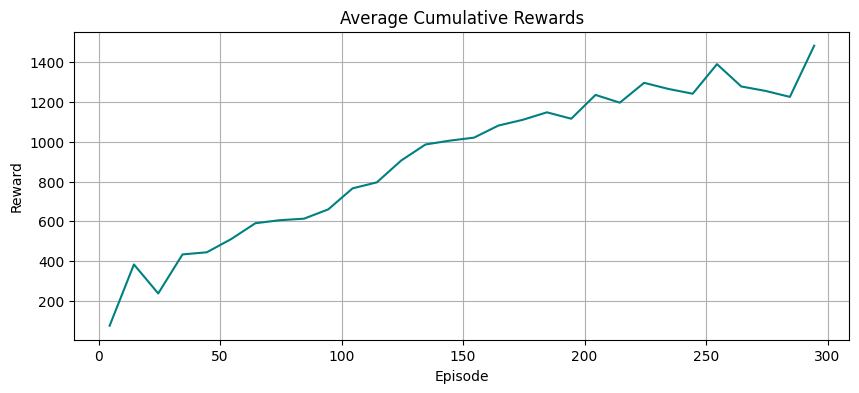

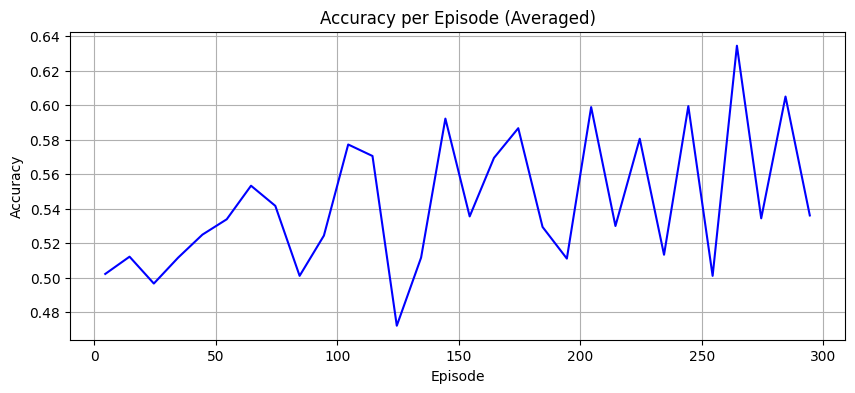

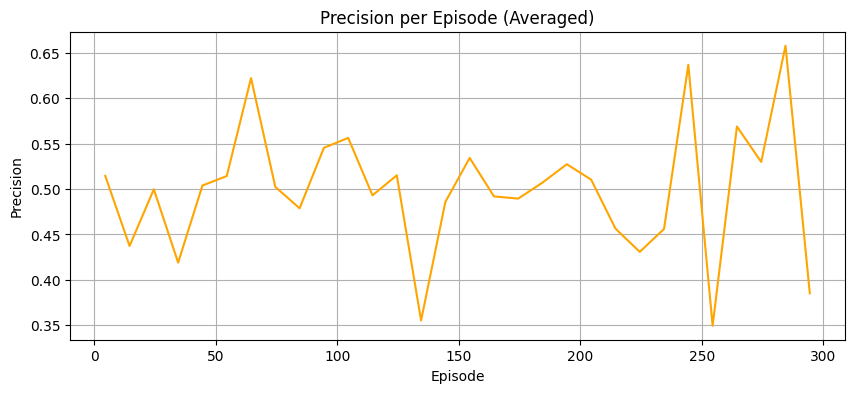

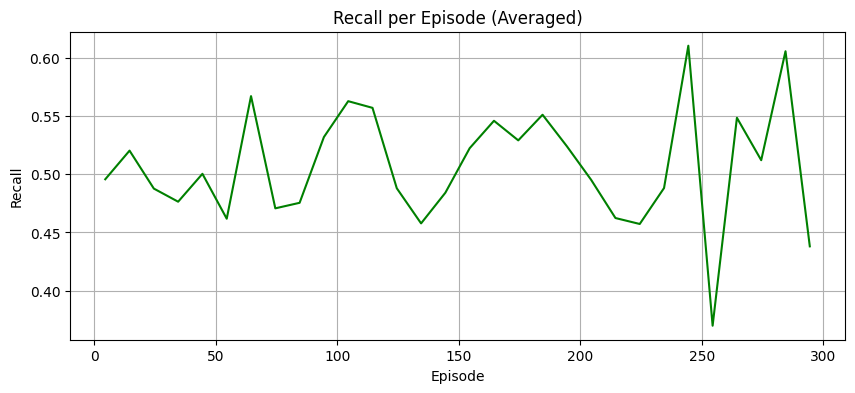

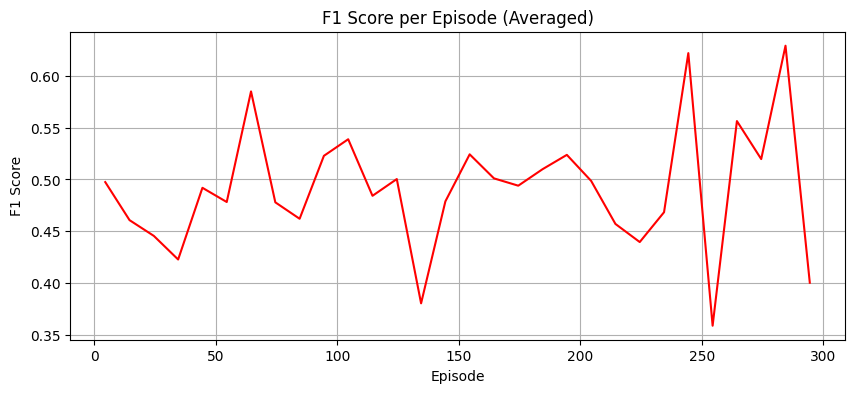

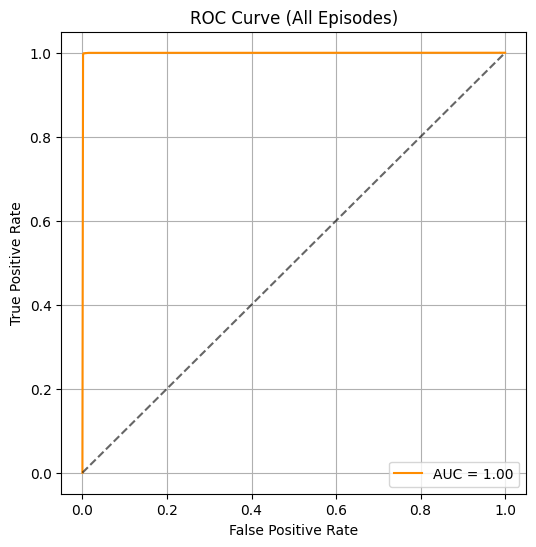

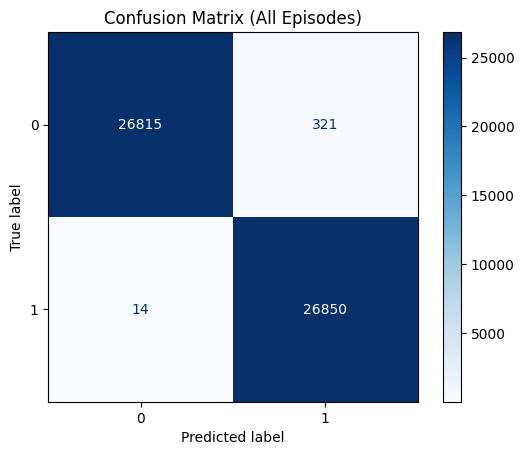

In [5]:
rewards_dict = {}
env = SBEOS_Environment(window_size=10,reward=10,penalty=10,pressure=0.1)
rewards, metrics, epoch_lengths, window_sizes, y_true, y_scores = train_dqn(env,model_type=L[4],num_episodes=300)
plot_metrics(rewards, metrics, epoch_lengths, window_sizes, y_true, y_scores, avg_window=10)
rewards_dict[4] = rewards

Ep 0 | Reward=-286.7 | Acc=0.55, Prec=0.91, Rec=0.56, F1=0.69, ROC-AUC=0.57
Ep 10 | Reward=411.6 | Acc=0.50, Prec=0.33, Rec=0.53, F1=0.41, ROC-AUC=1.00
Ep 20 | Reward=-166.3 | Acc=0.52, Prec=0.80, Rec=0.53, F1=0.64, ROC-AUC=1.00
Ep 30 | Reward=365.4 | Acc=0.46, Prec=0.42, Rec=0.46, F1=0.44, ROC-AUC=1.00
Ep 40 | Reward=577.0 | Acc=0.58, Prec=0.57, Rec=0.67, F1=0.62, ROC-AUC=1.00
Ep 50 | Reward=559.5 | Acc=0.43, Prec=0.34, Rec=0.37, F1=0.35, ROC-AUC=1.00
Ep 60 | Reward=736.4 | Acc=0.54, Prec=0.33, Rec=0.57, F1=0.42, ROC-AUC=1.00
Ep 70 | Reward=529.2 | Acc=0.46, Prec=0.47, Rec=0.46, F1=0.46, ROC-AUC=1.00
Ep 80 | Reward=854.4 | Acc=0.39, Prec=0.32, Rec=0.42, F1=0.36, ROC-AUC=1.00
Ep 90 | Reward=585.0 | Acc=0.53, Prec=0.44, Rec=0.51, F1=0.47, ROC-AUC=1.00


d:\Projects\venv\lib\site-packages\sklearn\metrics\_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


Ep 100 | Reward=831.7 | Acc=0.47, Prec=0.32, Rec=0.44, F1=0.37, ROC-AUC=1.00
Ep 110 | Reward=392.8 | Acc=0.47, Prec=0.54, Rec=0.43, F1=0.48, ROC-AUC=1.00
Ep 120 | Reward=859.1 | Acc=0.46, Prec=0.39, Rec=0.50, F1=0.44, ROC-AUC=1.00
Ep 130 | Reward=1077.5 | Acc=0.60, Prec=0.36, Rec=0.50, F1=0.42, ROC-AUC=1.00


d:\Projects\venv\lib\site-packages\sklearn\metrics\_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
d:\Projects\venv\lib\site-packages\sklearn\metrics\_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


Ep 140 | Reward=853.6 | Acc=0.82, Prec=1.00, Rec=0.82, F1=0.90, ROC-AUC=nan
Ep 150 | Reward=791.8 | Acc=0.67, Prec=0.84, Rec=0.74, F1=0.79, ROC-AUC=1.00
Ep 160 | Reward=939.9 | Acc=0.54, Prec=0.67, Rec=0.62, F1=0.64, ROC-AUC=1.00
Ep 170 | Reward=1066.2 | Acc=0.35, Prec=0.38, Rec=0.37, F1=0.37, ROC-AUC=1.00


d:\Projects\venv\lib\site-packages\sklearn\metrics\_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


Ep 180 | Reward=1148.1 | Acc=0.53, Prec=0.44, Rec=0.53, F1=0.48, ROC-AUC=1.00
Ep 190 | Reward=1241.4 | Acc=0.53, Prec=0.36, Rec=0.42, F1=0.39, ROC-AUC=1.00
Ep 200 | Reward=1268.4 | Acc=0.57, Prec=0.21, Rec=0.31, F1=0.25, ROC-AUC=1.00
Ep 210 | Reward=978.4 | Acc=0.53, Prec=0.64, Rec=0.62, F1=0.63, ROC-AUC=1.00
Ep 220 | Reward=1391.7 | Acc=0.42, Prec=0.27, Rec=0.33, F1=0.30, ROC-AUC=1.00
Ep 230 | Reward=1194.6 | Acc=0.47, Prec=0.46, Rec=0.51, F1=0.48, ROC-AUC=1.00
Ep 240 | Reward=1511.7 | Acc=0.74, Prec=0.17, Rec=0.37, F1=0.23, ROC-AUC=1.00
Ep 250 | Reward=1291.7 | Acc=0.59, Prec=0.14, Rec=0.33, F1=0.20, ROC-AUC=1.00
Ep 260 | Reward=1487.4 | Acc=0.69, Prec=0.24, Rec=0.48, F1=0.32, ROC-AUC=1.00
Ep 270 | Reward=1180.6 | Acc=0.42, Prec=0.52, Rec=0.50, F1=0.51, ROC-AUC=1.00
Ep 280 | Reward=1241.5 | Acc=0.54, Prec=0.54, Rec=0.58, F1=0.56, ROC-AUC=1.00
Ep 290 | Reward=1420.6 | Acc=0.56, Prec=0.18, Rec=0.23, F1=0.20, ROC-AUC=1.00


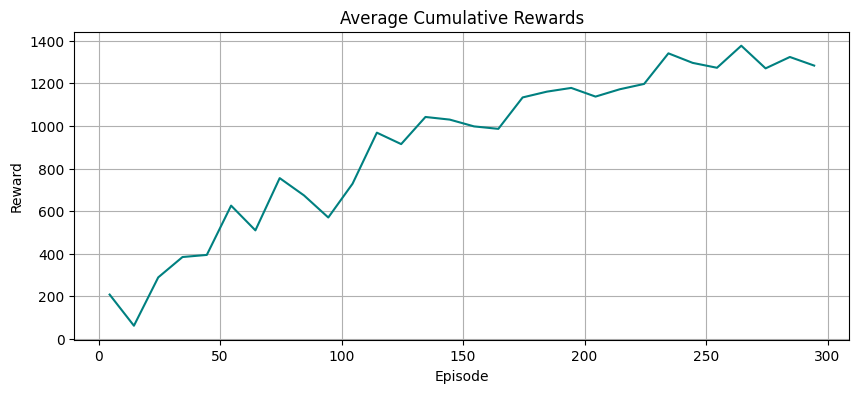

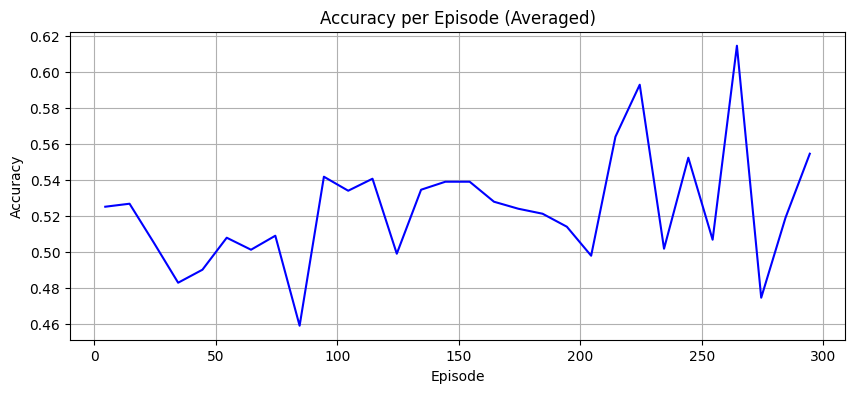

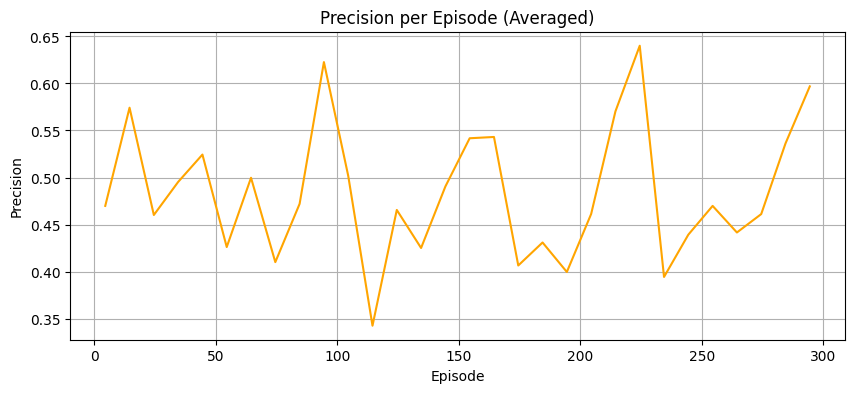

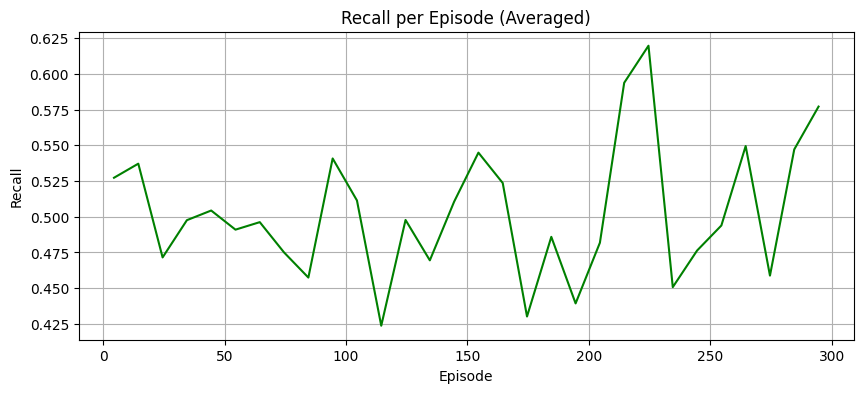

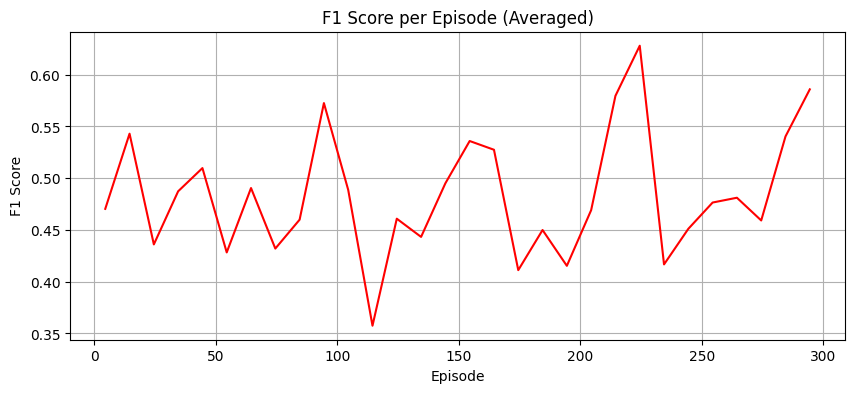

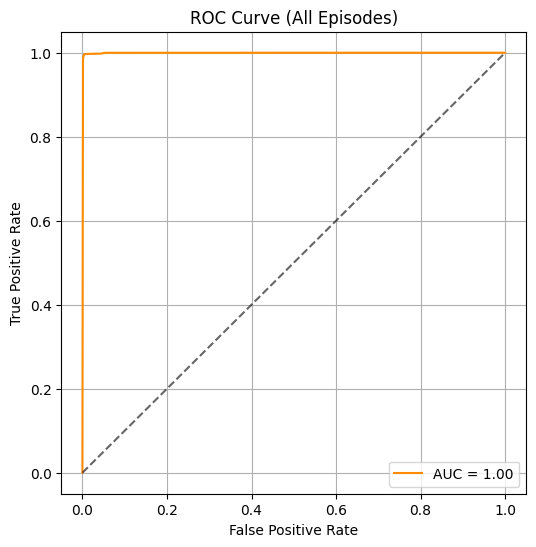

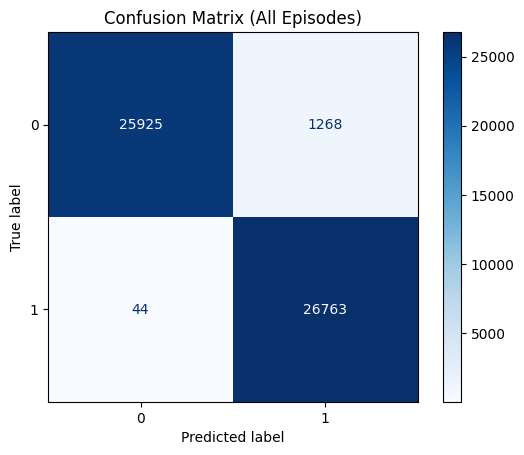

In [6]:
rewards_dict = {}
env = SBEOS_Environment(window_size=10,reward=10,penalty=10,pressure=0.1)
rewards, metrics, epoch_lengths, window_sizes, y_true, y_scores = train_dqn(env,model_type=L[5],num_episodes=300)
plot_metrics(rewards, metrics, epoch_lengths, window_sizes, y_true, y_scores, avg_window=10)
rewards_dict[5] = rewards

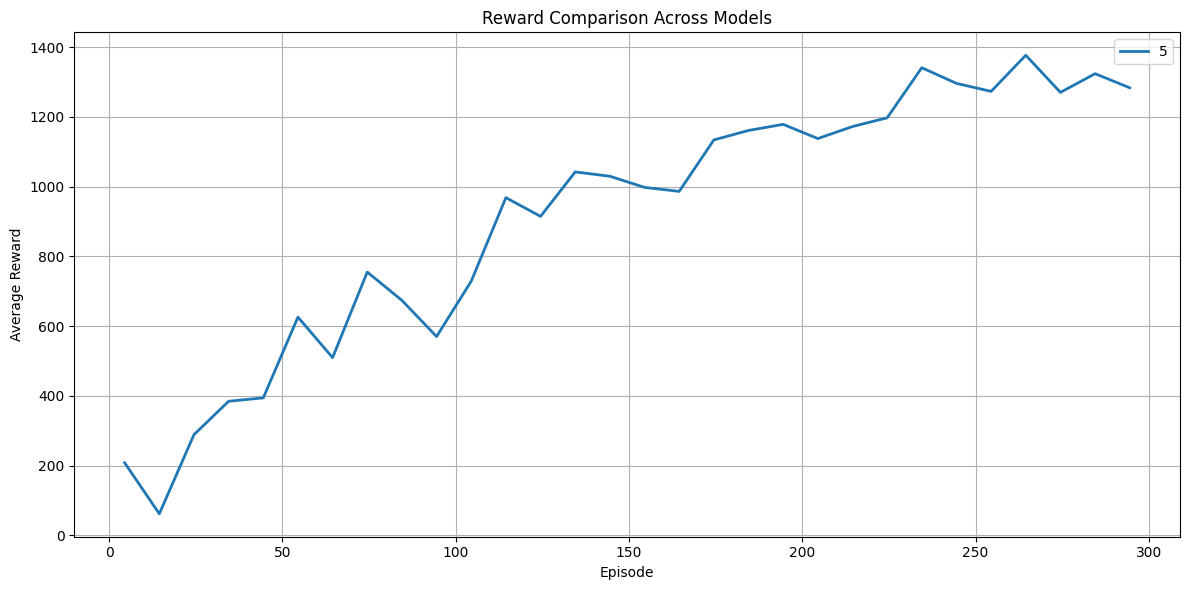

In [7]:
plot_reward_comparison(rewards_dict, avg_window=10)